In [1]:
import pandas as pd

In [2]:
oil = pd.read_csv("../retail/oil.csv", parse_dates=['date'])
oil.dtypes

date          datetime64[ns]
dcoilwtico           float64
dtype: object

# Assignment 1: Simple Line Chart

Build a simple line plot for the oil series. Are there any interesting patterns here? 

What happened in 2014 to oil price?

In [3]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


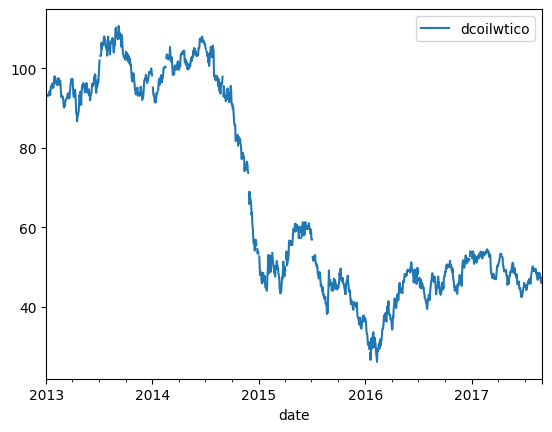

In [4]:
# plotting with 'x=column_for_x_axis' which plots all data
oil.plot(x='date');

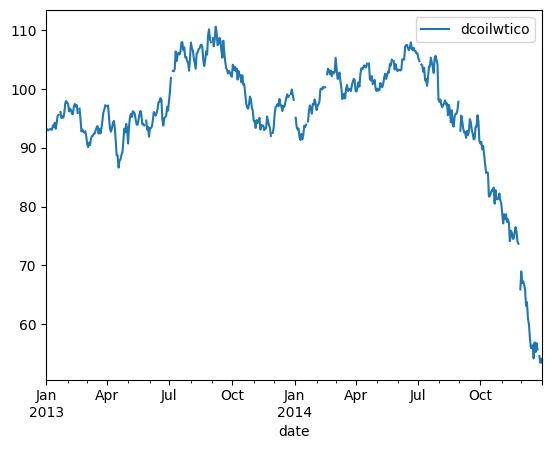

In [5]:
# plotting with set_index('column_for_x_axis)
oil.set_index('date').loc['2013':'2014'].plot();
# There  was a growing supply that was no capitalized upon and drove the prices down significantly

# Assignment 2: Upgraded Line Chart


Give your chart a style, add axis titles, and change the color of the line to black. 

Consider converting the date column to datetime64.

Rename the column to a more intuitive name for the audience.

In [6]:
# change date columns to datetime64
oil['date'] = oil['date'].astype('datetime64[ns]')
oil.dtypes

date          datetime64[ns]
dcoilwtico           float64
dtype: object

In [7]:
# rename dcoilwtico column to oil price using dictionary
oil = oil.rename(columns={'dcoilwtico':'Oil Price'})
oil.dtypes


date         datetime64[ns]
Oil Price           float64
dtype: object

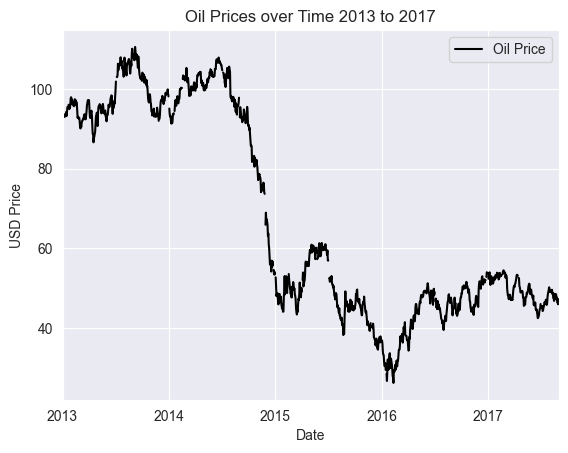

In [8]:
import seaborn as sns

# apply 'darkgrid' style to charts
sns.set_style('darkgrid')
# provide style, axis titles, and black line color to chart
oil.set_index('date').plot(
    xlabel='Date', 
    ylabel='USD Price',
    color='Black',
    title='Oil Prices over Time 2013 to 2017'
    );

# Assignment 3: Subplots

Filter the transactions table to stores 1, 2, 3 and 4, then reshape it so each row is a date, and the columns of the table are the transactions for each store. 

Once you've done that, create a 2x2 line plot of transactions vs time, with one plot for each store.

Thanks!

In [9]:
transactions = pd.read_csv("../retail/transactions.csv", parse_dates=['date'])
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [10]:
# filter store_nbr for Stores 1 to 4 using logical conditions
mask1234 = (
    (transactions['store_nbr'] >= 1) &
    (transactions['store_nbr'] < 5)
)
##### OR ######

# filter store_nbr for Stores 1 to 4 using pd['column_name].isin([]) method
mask_1234 = transactions['store_nbr'].isin([1,2,3,4])

# apply mask to transactions DataFrame
stores_1234 = transactions.loc[mask_1234]
stores_1234

,date,store_nbr,transactions
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
47,2013-01-03,1,1833
...,...,...,...
83383,2017-08-14,4,1285
83434,2017-08-15,1,1693
83435,2017-08-15,2,1737
83436,2017-08-15,3,2956


In [11]:
# Create a pivot table of stores 1 to 4 with daily transactions
stores_1234 = stores_1234.pivot_table(
    index='date',
    columns='store_nbr'
).droplevel(0, axis=1)
stores_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


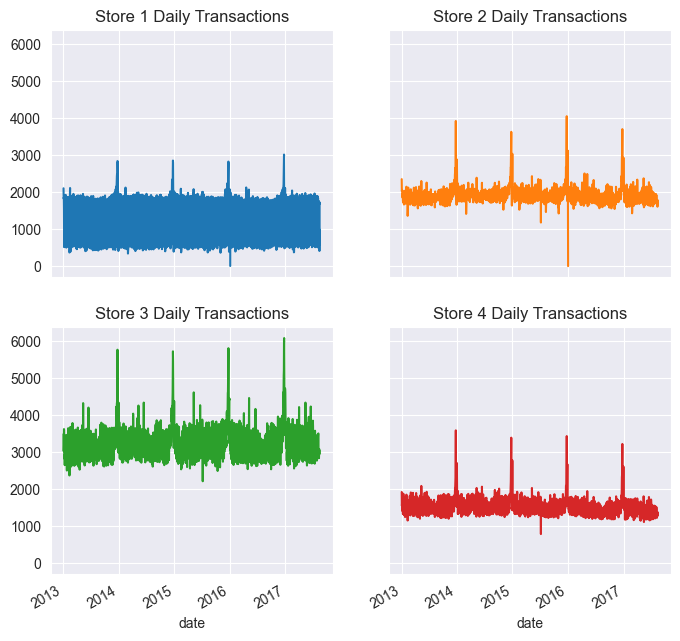

In [12]:
# create subplots(2 by 2), of transactions vs. Date
stores_1234.plot(
    subplots=True,
    sharey=True,
    layout=(2,2),
    figsize=(8,8),
    legend=False,
    title=['Store 1 Daily Transactions', 'Store 2 Daily Transactions', 'Store 3 Daily Transactions','Store 4 Daily Transactions']
    );

# Assignment 4: Bar Charts

Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4.

Then create a horizontal stacked bar chart of sales by month, stacked by store number. 

#### *Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4*

In [65]:
############ THIS CODE IS NOT AS NICE AS THE NEXT CODE ##########
# # create pivot table for sum of transactions
# stores_1234 = transactions.pivot_table(
#     index='store_nbr',
#     aggfunc=({'transactions':'sum'})
# )
# #filter pivot table for stores 1,2,3,4 and create descending barchart
# stores_1234.iloc[:4,].sort_values(by='transactions', ascending=False).plot.bar(
#     rot=45,
#     legend=False,
#     ).set_xticklabels(labels=['Store 3', 'Store 2', 'Store 1', 'Store 4',]);

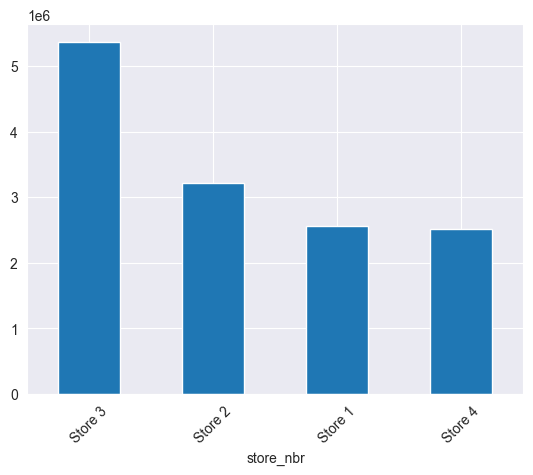

In [67]:
#### CREATE BAR CHART OF TOTAL TRANSACTIONS FOR STORES 1,2,3,4

# this previous code can be implmemented using .query method instead of iloc with @variable
# create filter1234 for stores 1,2,3,4
filter1234 = [1,2,3,4]
(transactions.query("store_nbr in @filter1234").pivot_table(
    index='store_nbr',
    aggfunc=({'transactions':'sum'})
# using .rename(index=) method with dictionary to rename index labels before sorting so they will be displayed in bar chart
).rename(index={1:'Store 1', 2:'Store 2', 3:'Store 3', 4:'Store 4'}).sort_values(by='transactions', ascending=False)
).plot.bar(
    rot=45,
    legend=False,
);

#### *CREATE HORIZONTAL BAR CHART y=Month and x=Transactions sorted by month for Stores 1,2,3,4* 

In [101]:
# assign row index dictionary for month name labels
monthdict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
# assign column dictionary for column name labels
storedict = {1:'Store 1', 2:'Store 2', 3:'Store 3', 4:'Store 4'}

# create pivot table for using .query method for each month for Stores 1,2,3,4, sorted ascending by month 
(transactions
        .query("store_nbr in @filter1234")
        .pivot_table(
        index=transactions['date'].dt.month,
        columns=transactions['store_nbr'],
        values='transactions',
        aggfunc='sum'
    ).sort_values('date').rename(index=(monthdict)).rename(columns=(storedict))
)

store_nbr,Store 1,Store 2,Store 3,Store 4
date,,,,
Jan,229203,284134,463260,222075
Feb,209400,265922,437238,209211
Mar,232178,293076,487224,231837
Apr,229081,287325,478308,223928
May,231160,293588,491961,228753
Jun,231514,284835,474668,222678
Jul,236032,288783,484698,224327
Aug,202821,255475,431752,200100
Sep,182035,228658,379101,178172


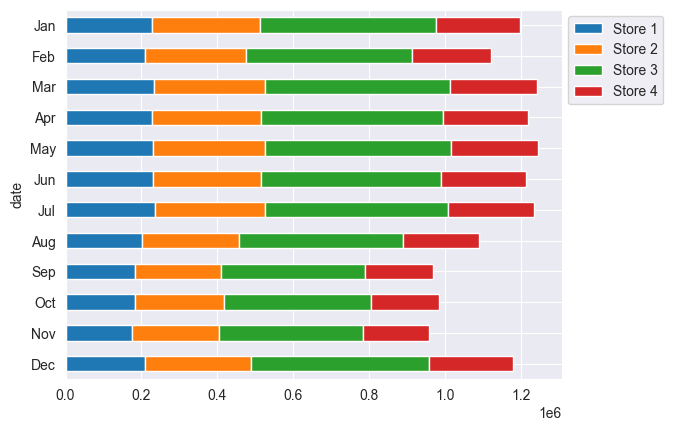

In [99]:
# create stacked barh chart using totals from pivot_table
(transactions
        .query("store_nbr in @filter1234")
        .pivot_table(
        index=transactions['date'].dt.month,
        columns=transactions['store_nbr'],
        values='transactions',
        aggfunc='sum'
    ).sort_values('date', ascending=False).rename(index=(monthdict)).rename(columns=(storedict))
).plot.barh(
    stacked=True,
    legend=False
).legend(bbox_to_anchor=(1,1));

In [84]:
# create total percent pivot table for individual months for Stores 1,2,3,4 using .apply(lambda function) method on pivot_table method
(transactions
        .query("store_nbr in @filter1234")
        .pivot_table(
        index=transactions['date'].dt.month,
        columns=transactions['store_nbr'],
        values='transactions',
        aggfunc='sum'
    ).rename(index=(monthdict)).rename(columns=(storedict)).apply( lambda x: x * 100/sum(x), axis=1).round(2)
)

store_nbr,Store 1,Store 2,Store 3,Store 4
date,,,,
Jan,19.12,23.70,38.65,18.53
Feb,18.67,23.71,38.98,18.65
Mar,18.66,23.55,39.16,18.63
Apr,18.80,23.58,39.25,18.38
May,18.56,23.57,39.50,18.37
Jun,19.08,23.47,39.11,18.35
Jul,19.13,23.41,39.28,18.18
Aug,18.60,23.43,39.60,18.36
Sep,18.81,23.62,39.16,18.41


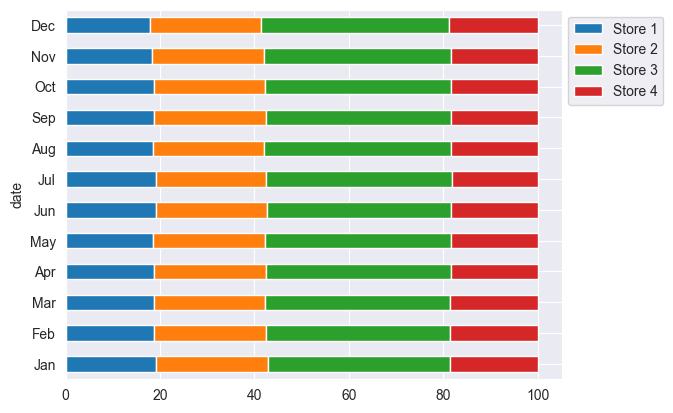

In [88]:
# create stacked barh chart using total percent pivot_table
(transactions
        .query("store_nbr in @filter1234")
        .pivot_table(
        index=transactions['date'].dt.month,
        columns=transactions['store_nbr'],
        values='transactions',
        aggfunc='sum'
    ).rename(index=(monthdict)).rename(columns=(storedict)).apply( lambda x: x * 100/sum(x), axis=1).round(2)
).plot.barh(
    stacked=True,
    legend=False
).legend(bbox_to_anchor=(1,1));

# Assignment 5: Scatterplots

Plot the relationship between store 2 and store 3 sales.

Color the dots by month.

Use `c=stores_1234.index.month` to do so.

In [16]:
stores_1234.head()

,transactions
store_nbr,
1970-01-01 00:00:00.000000001,2553963
1970-01-01 00:00:00.000000002,3219901
1970-01-01 00:00:00.000000003,5366350
1970-01-01 00:00:00.000000004,2519007
1970-01-01 00:00:00.000000005,2347877


# Assignment 6: Histograms

Hi there,

Can you plot the distributions of sales for stores 2 and 3?

I want to see how often store 2 has sales similar to store 3, as well as if there are any outlier type days.

Thanks!


In [17]:
stores_1234.head()

,transactions
store_nbr,
1970-01-01 00:00:00.000000001,2553963
1970-01-01 00:00:00.000000002,3219901
1970-01-01 00:00:00.000000003,5366350
1970-01-01 00:00:00.000000004,2519007
1970-01-01 00:00:00.000000005,2347877
